### Path Issue

In [1]:
import sys
sys.path.append('/Users/lenaoudjman/Desktop/ZOIDBERG2.0/src')

## 0. Import

In [2]:
import os
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import tensorflow as tf
import shutil
import random

from config  import PATH_PERSO_TRAIN_PROF, PATH_PERSO_VALID_PROF, PATH_PERSO_TEST_PROF
from config import PATH_PERSO_TEST_SAME_PROPOR, PATH_PERSO_TRAIN_SAME_PROPOR, PATH_PERSO_VALID_SAME_PROPOR
from config import PATH_PERSO_TEST_INTRA, PATH_PERSO_TRAIN_INTRA, PATH_PERSO_VALID_INTRA
from config import PATH_PERSO_TEST_ADD, PATH_PERSO_TRAIN_ADD, PATH_PERSO_VALID_ADD

from utils.data_process import mix_dataset_same_labels, distribuer_images, mix_dataset_same_labels_Pneumonia, get_weight
from utils.directory_process import clean_path, create_directory, dir_file_count
from utils.model_process import name_correct
from utils.visu_process import get_reset_plot_params, show_train_val_test, show_train_val_test_new

## 1. Show Data : Are there any modifications to be made ?

In [3]:
train_dir = PATH_PERSO_TRAIN_PROF
validation_dir = PATH_PERSO_VALID_PROF
testing_dir = PATH_PERSO_TEST_PROF

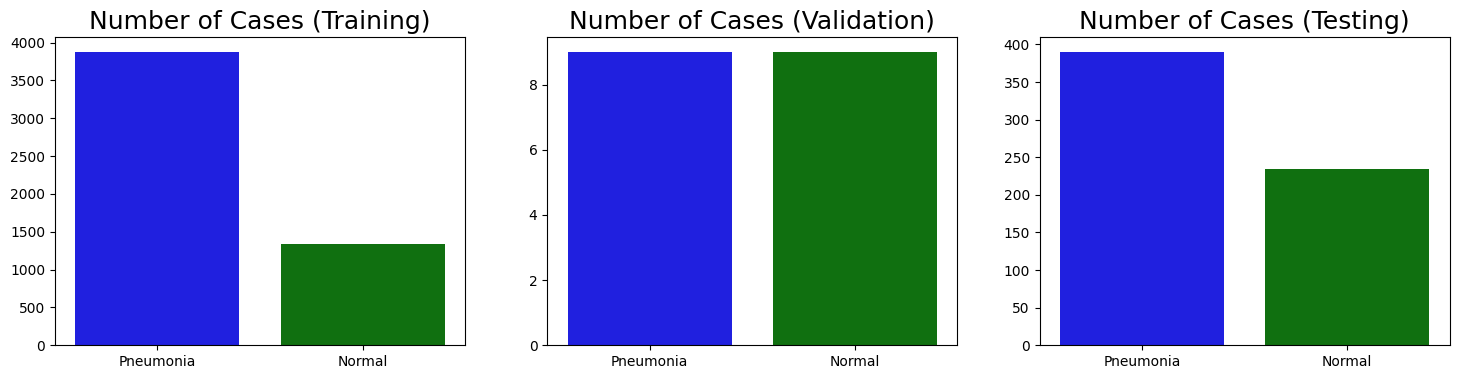

In [4]:
plot_params = get_reset_plot_params()
plot_params['title'] = "Number of Cases"
plot_params['subplot'] = 131

paths_to_clean = [train_dir, validation_dir, testing_dir]
clean_path(paths_to_clean)

show_train_val_test(train_dir, validation_dir, testing_dir, plot_params)
classes = os.listdir(train_dir)
classes = [name_correct(class_name) for class_name in classes]

Trainning : (5216 images)
Il y a prés de 3 foix plus de données pneumonia que de données normal => il à deux sortes de scanner Pneumonia : les virals et les bactériennes


Validation : (16 images)
Meme nombre de pneumonia et de normal. De plus, il n'y a que des données de bacteries et non de virus. 

Test :
Repartition plutot bonne.

Les pourcentages sont generalements de 70% trainning, 15% validation et 15% test.

In [37]:
rescale = 1./255
target_size = (150, 150)
batch_size = len(train_dir)
class_mode = "categorical"

train_datagen = ImageDataGenerator(
    rescale=rescale,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    class_mode=class_mode,
    batch_size=batch_size,
    shuffle=True)

class_weight = get_weight(train_generator.classes)
class_weight = dict(enumerate(class_weight))
class_weight

Found 5216 images belonging to 2 classes.


{0: 1.9448173005219984, 1: 0.6730322580645162}

### Path I need

In [6]:
train_path_old_normal = PATH_PERSO_TRAIN_PROF + "/NORMAL"
validation_path_old_normal = PATH_PERSO_VALID_PROF + "/NORMAL"
test_path_old_normal = PATH_PERSO_TEST_PROF + "/NORMAL"

train_path_old_malade = PATH_PERSO_TRAIN_PROF + "/PNEUMONIA"
validation_path_old_malade = PATH_PERSO_VALID_PROF + "/PNEUMONIA"
test_path_old_malade = PATH_PERSO_TEST_PROF + "/PNEUMONIA"

## 2. New Path : Same Proportion des données (70% : 0 , 15% : 1 , 15% : 2)

### Création new paths

In [7]:
create_directory(PATH_PERSO_TRAIN_SAME_PROPOR)
create_directory(PATH_PERSO_TEST_SAME_PROPOR)
create_directory(PATH_PERSO_VALID_SAME_PROPOR)

True

In [8]:
train_path_new_normal = PATH_PERSO_TRAIN_SAME_PROPOR + "/NORMAL"
validation_path_new_normal = PATH_PERSO_VALID_SAME_PROPOR + "/NORMAL"
test_path_new_normal = PATH_PERSO_TEST_SAME_PROPOR + "/NORMAL"

create_directory(train_path_new_normal)
create_directory(validation_path_new_normal)
create_directory(test_path_new_normal)

True

In [9]:
train_path_new_VIRUS = PATH_PERSO_TRAIN_SAME_PROPOR + "/PNEUMONIA_V"
validation_path_new_VIRUS = PATH_PERSO_VALID_SAME_PROPOR + "/PNEUMONIA_V"
test_path_new_VIRUS = PATH_PERSO_TEST_SAME_PROPOR + "/PNEUMONIA_V"

train_path_new_BACTERIA = PATH_PERSO_TRAIN_SAME_PROPOR + "/PNEUMONIA_B"
validation_path_new_BACTERIA = PATH_PERSO_VALID_SAME_PROPOR + "/PNEUMONIA_B"
test_path_new_BACTERIA = PATH_PERSO_TEST_SAME_PROPOR + "/PNEUMONIA_B"

create_directory(train_path_new_VIRUS)
create_directory(validation_path_new_VIRUS)
create_directory(test_path_new_VIRUS)

create_directory(train_path_new_BACTERIA)
create_directory(validation_path_new_BACTERIA)
create_directory(test_path_new_BACTERIA)

True

### Mélange de nos données Normal et redistribution : seed intergré donc on a tous les mêmes datasets

In [10]:
data_normal = mix_dataset_same_labels(train_path_old_normal,validation_path_old_normal,test_path_old_normal)
distribuer_images(data_normal, train_path_new_normal, validation_path_new_normal, test_path_new_normal)
print("Nombre de fichiers déplacés",len(data_normal))

Nombre de fichiers déplacés 1583


### Mélange de nos données Malade, divison entre virus et bacteria et redistribution : seed intergré donc on a tous les mêmes datasets

In [11]:
data_normal_virus, data_normal_bacteria = mix_dataset_same_labels_Pneumonia(train_path_old_malade,validation_path_old_malade,test_path_old_malade)
distribuer_images(data_normal_bacteria, train_path_new_BACTERIA, validation_path_new_BACTERIA, test_path_new_BACTERIA)
distribuer_images(data_normal_virus, train_path_new_VIRUS, validation_path_new_VIRUS, test_path_new_VIRUS)
print("Nombre de fichiers à déplacés",len(data_normal_virus)+len(data_normal_bacteria))

Nombre de fichiers à déplacés 4273


### Visualisation 

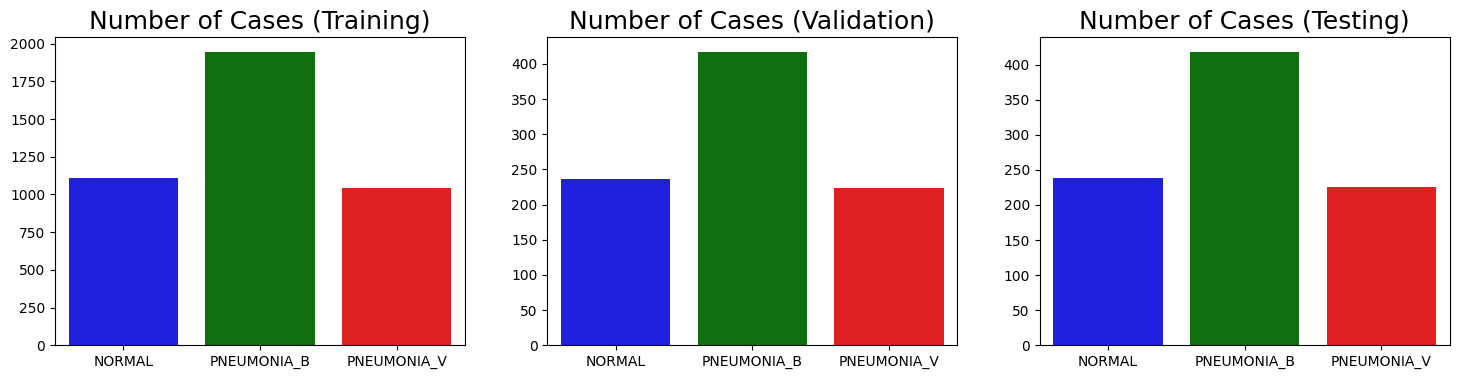

In [12]:
plot_params = get_reset_plot_params()
plot_params['title'] = "Number of Cases"

paths_to_clean = [PATH_PERSO_TRAIN_SAME_PROPOR, PATH_PERSO_VALID_SAME_PROPOR, PATH_PERSO_TEST_SAME_PROPOR]
clean_path(paths_to_clean)

show_train_val_test_new(PATH_PERSO_TRAIN_SAME_PROPOR, PATH_PERSO_VALID_SAME_PROPOR, PATH_PERSO_TEST_SAME_PROPOR, plot_params)
classes = os.listdir(PATH_PERSO_TRAIN_SAME_PROPOR)
classes = [name_correct(class_name) for class_name in classes]

### Weight of Data

In [13]:
rescale = 1./255
target_size = (150, 150)
batch_size = len(train_dir)
class_mode = "categorical"

train_datagen = ImageDataGenerator(
    rescale=rescale,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    PATH_PERSO_TRAIN_SAME_PROPOR,
    target_size=target_size,
    class_mode=class_mode,
    color_mode="grayscale",
    batch_size=batch_size,
    shuffle=True)

class_weight = get_weight(train_generator.classes)
class_weight = dict(enumerate(class_weight))
class_weight

Found 4098 images belonging to 3 classes.


{0: 1.2328519855595668, 1: 0.7023136246786632, 2: 1.307177033492823}

0 : Non malade, sain, ils ne sont pas majoritaire dans la representation des données donc leur poids est legerement superieur
1 : Malade dû a une bacterie, cette data est le plus present, son poids est donc plus faible 
2 : Malade dû a un virus, ils ne sont pas majoritaire dans la representation des données donc leur poids est legerement superieur

Attention , avant j'avais plus de 1000 données train en plus

### Visualisation Image

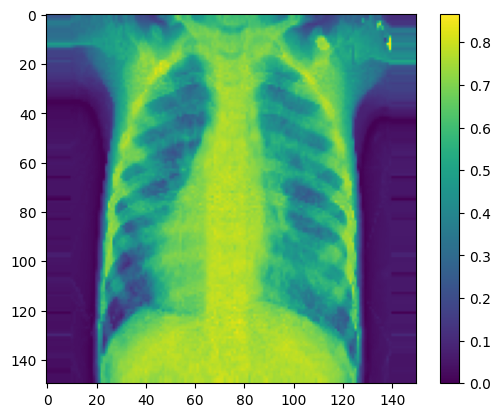

In [14]:
plt.figure()
plt.imshow(train_generator[len(train_generator)-1][0][:][:][0])
plt.colorbar()
plt.show()

## 3. New path : 2. + meme proportion intra train dataset

### Création new paths

In [15]:
create_directory(PATH_PERSO_TRAIN_INTRA)
create_directory(PATH_PERSO_TEST_INTRA)
create_directory(PATH_PERSO_VALID_INTRA)

True

In [16]:
train_path_new_intra_normal = PATH_PERSO_TRAIN_INTRA + "/NORMAL"
test_path_new_intra_normal = PATH_PERSO_TEST_INTRA + "/NORMAL"
validation_path_new_intra_normal = PATH_PERSO_VALID_INTRA + "/NORMAL"

train_path_new_intra_virus = PATH_PERSO_TRAIN_INTRA + "/PNEUMONIA_V"
test_path_new_intra_virus = PATH_PERSO_TEST_INTRA + "/PNEUMONIA_V"
validation_path_new_intra_virus = PATH_PERSO_VALID_INTRA + "/PNEUMONIA_V"

train_path_new_intra_bacteria = PATH_PERSO_TRAIN_INTRA + "/PNEUMONIA_B"
test_path_new_intra_bacteria = PATH_PERSO_TEST_INTRA + "/PNEUMONIA_B"
validation_path_new_intra_bacteria = PATH_PERSO_VALID_INTRA + "/PNEUMONIA_B"

create_directory(train_path_new_intra_normal)
create_directory(test_path_new_intra_normal)
create_directory(validation_path_new_intra_normal)

create_directory(train_path_new_intra_virus)
create_directory(test_path_new_intra_virus)
create_directory(validation_path_new_intra_virus)

create_directory(train_path_new_intra_bacteria)
create_directory(test_path_new_intra_bacteria)
create_directory(validation_path_new_intra_bacteria)

True

### Copy les images dans les nouveaux fichiers correspondants

In [17]:
for filename in os.listdir(test_path_new_normal):
    shutil.copy(test_path_new_normal + '/' + filename, test_path_new_intra_normal)
for filename in os.listdir(validation_path_new_normal):
    shutil.copy(validation_path_new_normal + '/' + filename, validation_path_new_intra_normal)
for filename in os.listdir(train_path_new_normal):
    shutil.copy(train_path_new_normal + '/' + filename, train_path_new_intra_normal)

In [18]:
for filename in os.listdir(test_path_new_VIRUS):
    shutil.copy(test_path_new_VIRUS + '/' + filename, test_path_new_intra_virus)
for filename in os.listdir(validation_path_new_VIRUS):
    shutil.copy(validation_path_new_VIRUS + '/' + filename, validation_path_new_intra_virus)
for filename in os.listdir(train_path_new_VIRUS):
    shutil.copy(train_path_new_VIRUS + '/' + filename, train_path_new_intra_virus)

In [19]:
for filename in os.listdir(test_path_new_BACTERIA):
    shutil.copy(test_path_new_BACTERIA + '/' + filename, test_path_new_intra_bacteria)
for filename in os.listdir(validation_path_new_BACTERIA):
    shutil.copy(validation_path_new_BACTERIA + '/' + filename, validation_path_new_intra_bacteria)
for filename in os.listdir(train_path_new_BACTERIA):
    shutil.copy(train_path_new_BACTERIA + '/' + filename, train_path_new_intra_bacteria)

### Redistribution de x images de Train : Bacteria dans Validation : Bacteria

In [20]:
nb_train_normal = dir_file_count(train_path_new_normal)
nb_train_virus = dir_file_count(train_path_new_VIRUS)
nb_train_bacteria = dir_file_count(train_path_new_BACTERIA)

diff_data_train_bacteria = nb_train_bacteria - (max(nb_train_normal, nb_train_virus))

random.shuffle(os.listdir(train_path_new_BACTERIA))
for i in range (diff_data_train_bacteria):
    file_name = os.listdir(train_path_new_BACTERIA)[i]

    source_path = os.path.join(train_path_new_intra_bacteria, file_name)
    destination_path = os.path.join(validation_path_new_intra_bacteria, file_name)

    os.rename(source_path, destination_path)

### Visualisation

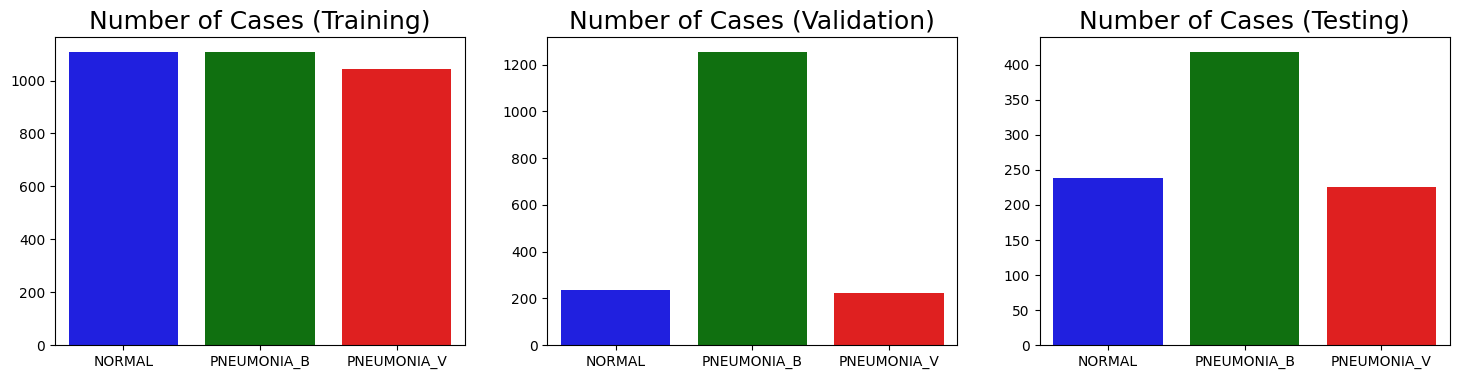

In [21]:
plot_params = get_reset_plot_params()
plot_params['title'] = "Number of Cases"

paths_to_clean = [PATH_PERSO_TRAIN_INTRA, PATH_PERSO_VALID_INTRA, PATH_PERSO_TEST_INTRA]
clean_path(paths_to_clean)

show_train_val_test_new(PATH_PERSO_TRAIN_INTRA, PATH_PERSO_VALID_INTRA, PATH_PERSO_TEST_INTRA, plot_params)
classes = os.listdir(PATH_PERSO_TRAIN_INTRA)
classes = [name_correct(class_name) for class_name in classes]

### Weight of Data

In [22]:
rescale = 1./255
target_size = (150, 150)
batch_size = len(train_dir)
class_mode = "categorical"

train_datagen = ImageDataGenerator(
    rescale=rescale,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    PATH_PERSO_TRAIN_INTRA,
    target_size=target_size,
    class_mode=class_mode,
    color_mode="grayscale",
    batch_size=batch_size,
    shuffle=True)

class_weight = get_weight(train_generator.classes)
class_weight = dict(enumerate(class_weight))
class_weight

Found 3261 images belonging to 3 classes.


{0: 0.9810469314079422, 1: 0.9810469314079422, 2: 1.0401913875598086}

## 4. New path : 2. + Augmenter les données dans le train ( et validation ? ) 

### Exemple Image Flip

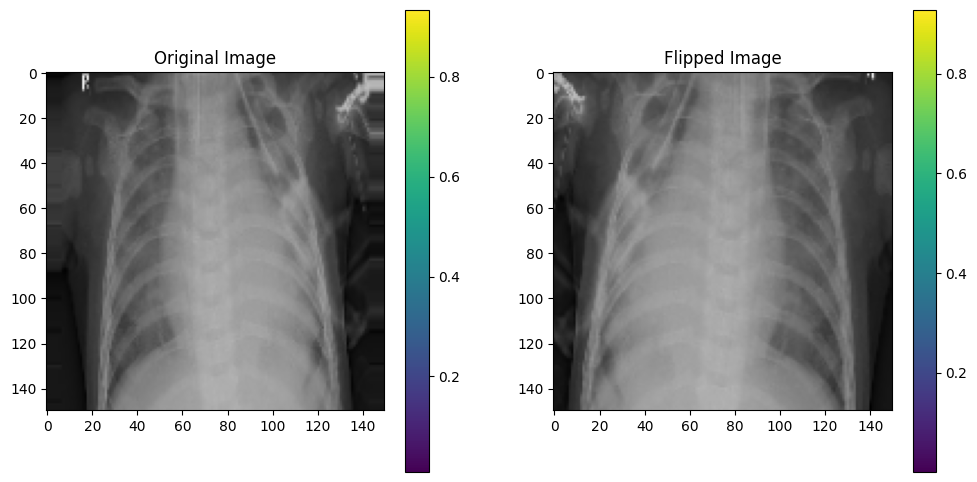

In [44]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(train_generator[len(train_generator)-1][0][:][:][0])
plt.title("Original Image")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(tf.image.flip_left_right(train_generator[len(train_generator)-1][0][:][:][0]))
plt.title("Flipped Image")
plt.colorbar()

plt.show()

### New path

In [24]:
create_directory(PATH_PERSO_TRAIN_ADD)
create_directory(PATH_PERSO_TEST_ADD)
create_directory(PATH_PERSO_VALID_ADD)

True

In [25]:
train_path_new_add_normal = PATH_PERSO_TRAIN_ADD + "/NORMAL"
test_path_new_add_normal = PATH_PERSO_TEST_ADD + "/NORMAL"
validation_path_new_add_normal = PATH_PERSO_VALID_ADD + "/NORMAL"

train_path_new_add_virus = PATH_PERSO_TRAIN_ADD + "/PNEUMONIA_V"
test_path_new_add_virus = PATH_PERSO_TEST_ADD + "/PNEUMONIA_V"
validation_path_new_add_virus = PATH_PERSO_VALID_ADD + "/PNEUMONIA_V"

train_path_new_add_bacteria = PATH_PERSO_TRAIN_ADD + "/PNEUMONIA_B"
test_path_new_add_bacteria= PATH_PERSO_TEST_ADD + "/PNEUMONIA_B"
validation_path_new_add_bacteria = PATH_PERSO_VALID_ADD + "/PNEUMONIA_B"


create_directory(train_path_new_add_normal)
create_directory(test_path_new_add_normal)
create_directory(validation_path_new_add_normal)

create_directory(train_path_new_add_virus)
create_directory(test_path_new_add_virus)
create_directory(validation_path_new_add_virus)

create_directory(train_path_new_add_bacteria)
create_directory(test_path_new_add_bacteria)
create_directory(validation_path_new_add_bacteria)

True

### Copy les images dans les nouveaux fichiers correspondants

In [26]:
for filename in os.listdir(test_path_new_normal):
    shutil.copy(test_path_new_normal + '/' + filename, test_path_new_add_normal)
for filename in os.listdir(validation_path_new_normal):
    shutil.copy(validation_path_new_normal + '/' + filename, validation_path_new_add_normal)
for filename in os.listdir(train_path_new_normal):
    shutil.copy(train_path_new_normal + '/' + filename, train_path_new_add_normal)

In [27]:
for filename in os.listdir(test_path_new_VIRUS):
    shutil.copy(test_path_new_VIRUS + '/' + filename, test_path_new_add_virus)
for filename in os.listdir(validation_path_new_VIRUS):
    shutil.copy(validation_path_new_VIRUS + '/' + filename, validation_path_new_add_virus)
for filename in os.listdir(train_path_new_VIRUS):
    shutil.copy(train_path_new_VIRUS + '/' + filename, train_path_new_add_virus)

In [28]:
for filename in os.listdir(test_path_new_BACTERIA):
    shutil.copy(test_path_new_BACTERIA + '/' + filename, test_path_new_add_bacteria)
for filename in os.listdir(validation_path_new_BACTERIA):
    shutil.copy(validation_path_new_BACTERIA + '/' + filename, validation_path_new_add_bacteria)
for filename in os.listdir(train_path_new_BACTERIA):
    shutil.copy(train_path_new_BACTERIA + '/' + filename, train_path_new_add_bacteria)

### Voir la differnece de quantité de données

In [36]:
nb_train_normal = dir_file_count(train_path_new_normal)
nb_train_virus = dir_file_count(train_path_new_VIRUS)
nb_train_bacteria = dir_file_count(train_path_new_BACTERIA)

nb_val_normal = dir_file_count(validation_path_new_normal)
nb_val_virus = dir_file_count(validation_path_new_VIRUS)
nb_val_bacteria = dir_file_count(validation_path_new_BACTERIA)

diff_bacteria_train = nb_train_bacteria - (max(nb_train_normal, nb_train_virus))
diff_bacteria_val = nb_val_bacteria - (max(nb_val_normal, nb_val_virus))

### Create flip image and save it in Validation : Normal 

In [30]:
for i in range (diff_bacteria_val): 
    source_file = os.listdir(validation_path_new_add_normal)[i]
    source_path = os.path.join(validation_path_new_add_normal, source_file)

    file_name = "reverse_" + source_file
    destination_path = os.path.join(validation_path_new_add_normal, file_name)

    image = load_img(source_path)
    image_array = img_to_array(image)
    flipped_image_array = tf.image.flip_left_right(image_array)
    flipped_image = array_to_img(flipped_image_array)

    flipped_image.save(destination_path)
 

print("Le dossier validation normal contient desormais",dir_file_count(validation_path_new_add_normal), "files, contre ",nb_val_normal, "files avant")

Le dossier validation normal contient desormais 378 files.


### Create flip image and save it in Validation : Virus 

In [31]:
for i in range (diff_bacteria_val):
    source_file = os.listdir(validation_path_new_add_virus)[i]
    source_path = os.path.join(validation_path_new_add_virus, source_file)

    file_name = "reverse_" + source_file
    destination_path = os.path.join(validation_path_new_add_virus, file_name)

    image = load_img(source_path)
    image_array = img_to_array(image)
    flipped_image_array = tf.image.flip_left_right(image_array)
    flipped_image = array_to_img(flipped_image_array)

    flipped_image.save(destination_path)

print("Le dossier validation normal contient desormais",dir_file_count(validation_path_new_add_virus), "files, contre ",nb_val_virus, "files avant")

Le dossier validation normal contient desormais 353 files.


### Create flip image and save it in Train : Normal 

In [32]:
for i in range (diff_bacteria_train):
    source_file = os.listdir(train_path_new_add_normal)[i]
    source_path = os.path.join(train_path_new_add_normal, source_file)

    file_name = "reverse_" + source_file
    destination_path = os.path.join(train_path_new_add_normal, file_name)

    image = load_img(source_path)
    image_array = img_to_array(image)
    flipped_image_array = tf.image.flip_left_right(image_array)
    flipped_image = array_to_img(flipped_image_array)

    flipped_image.save(destination_path)

print("Le dossier validation normal contient desormais",dir_file_count(train_path_new_add_normal), "files, contre ",nb_train_normal, "files avant")

Le dossier validation normal contient desormais 1734 files.


### Create flip image and save it in Train : Virus 

In [33]:
for i in range (diff_bacteria_train):
    source_file = os.listdir(train_path_new_add_virus)[i]
    source_path = os.path.join(train_path_new_add_virus, source_file )

    file_name = "reverse_" + source_file
    destination_path = os.path.join(train_path_new_add_virus, file_name)

    image = load_img(source_path)
    image_array = img_to_array(image)
    flipped_image_array = tf.image.flip_left_right(image_array)
    flipped_image = array_to_img(flipped_image_array)

    flipped_image.save(destination_path)

print("Le dossier validation normal contient desormais",dir_file_count(train_path_new_add_virus), "files, contre ",nb_train_virus, "files avant")

Le dossier validation normal contient desormais 1687 files.


### Visualisation

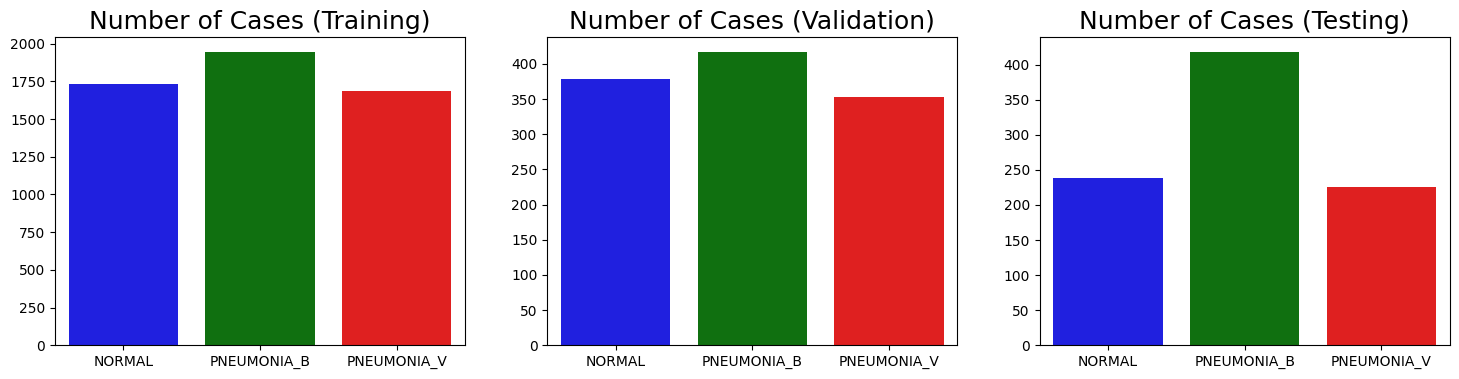

In [34]:
plot_params = get_reset_plot_params()
plot_params['title'] = "Number of Cases"

paths_to_clean = [PATH_PERSO_TRAIN_ADD, PATH_PERSO_VALID_ADD, PATH_PERSO_TEST_ADD]
clean_path(paths_to_clean)

show_train_val_test_new(PATH_PERSO_TRAIN_ADD, PATH_PERSO_VALID_ADD, PATH_PERSO_TEST_ADD, plot_params)
classes = os.listdir(PATH_PERSO_TRAIN_ADD)
classes = [name_correct(class_name) for class_name in classes]

### Weight of Data

In [35]:
rescale = 1./255
target_size = (150, 150)
batch_size = len(train_dir)
class_mode = "categorical"

train_datagen = ImageDataGenerator(
    rescale=rescale,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    PATH_PERSO_TRAIN_ADD,
    target_size=target_size,
    class_mode=class_mode,
    color_mode="grayscale",
    batch_size=batch_size,
    shuffle=True)

class_weight = get_weight(train_generator.classes)
class_weight = dict(enumerate(class_weight))
class_weight

Found 5366 images belonging to 3 classes.


{0: 1.0315263360246059, 1: 0.9196229648671808, 2: 1.0602647698083383}